In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
df = pd.read_csv('appliance_energy.csv')
print(df.head())


   Temperature (°C)  Energy Consumption (kWh)
0         22.490802                  2.292604
1         34.014286                  3.251925
2         29.639879                  3.009868
3         26.973170                  1.703533
4         18.120373                  1.702201


In [9]:
df.head()

,Temperature (°C),Energy Consumption (kWh)
0,22.490802,2.292604
1,34.014286,3.251925
2,29.639879,3.009868
3,26.973170,1.703533
4,18.120373,1.702201


In [11]:
print(df.isnull().sum())

Temperature (°C)            0
Energy Consumption (kWh)    0
dtype: int64


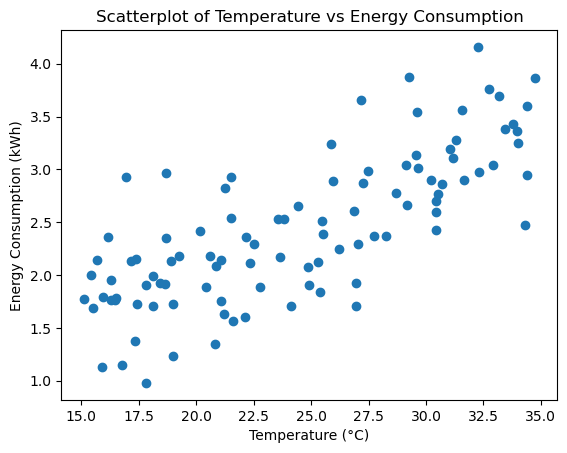

In [13]:
# Create the scatterplot
plt.scatter(df['Temperature (°C)'], df['Energy Consumption (kWh)'])
plt.xlabel('Temperature (°C)')
plt.ylabel('Energy Consumption (kWh)')
plt.title('Scatterplot of Temperature vs Energy Consumption')
plt.show()


In [15]:
df.describe()

,Temperature (°C),Energy Consumption (kWh)
count,100.000000,100.000000
mean,24.403615,2.439821
std,5.949788,0.693527
min,15.110442,0.978107
25%,18.864015,1.908640
50%,24.282849,2.364121
75%,29.604062,2.931199
max,34.737739,4.159094


In [19]:
# Features (independent variables) and Target(dependent variables)
# Independent variable(temprature)
X = df[['Temperature (°C)']]
# dependent variable(Energy Consumption)
y = df[['Energy Consumption (kWh)']]

In [27]:
#Split the into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# same random samples will be taken every single time

In [33]:
X_train.head()

,Temperature (°C)
55,33.437485
88,32.744255
26,18.993476
42,15.687770
69,34.737739


In [39]:
y_train.head()

,Energy Consumption (kWh)
55,3.378030
88,3.756114
26,1.727990
42,2.140188
69,3.864685


In [41]:
X_test.head()

,Temperature (°C)
83,16.271167
53,32.896547
70,30.444895
45,28.250446
44,20.175600


In [43]:
y_test.head()

,Energy Consumption (kWh)
83,1.955394
53,3.037917
70,2.426014
45,2.370351
44,2.413076


In [31]:
#Create a linear regression model
model = LinearRegression()
#Train the model
model.fit(X_train, y_train)

LinearRegression()

In [49]:
print('Slope: ', model.coef_)
print('y-intercept: ', model.intercept_)

Slope:  [[0.08996618]]
y-intercept:  [0.22196392]


In [75]:
# y = mx + c
print(model.coef_*22.49 + model.intercept_)

[[2.24530337]]


In [77]:
2.25-2.29 # this will give you the error

-0.040000000000000036

In [53]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [55]:
y_pred

array([[1.6858187 ],
       [3.18154068],
       [2.96097494],
       [2.76354868],
       [2.0370856 ],
       [2.36343345],
       [2.09711944],
       [3.12445907],
       [1.60849483],
       [2.24537556],
       [2.34866555],
       [2.66462648],
       [3.0387357 ],
       [3.27880886],
       [1.78664542],
       [1.85218469],
       [2.95922164],
       [1.70468695],
       [3.0692904 ],
       [1.87828475]])

In [57]:
#Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

#Calculate R-Squared value
r2 = r2_score(y_test, y_pred)
print(f'R-Squared: {r2}')

Mean Squared Error: 0.16342487842925058
R-Squared: 0.6119478445218713


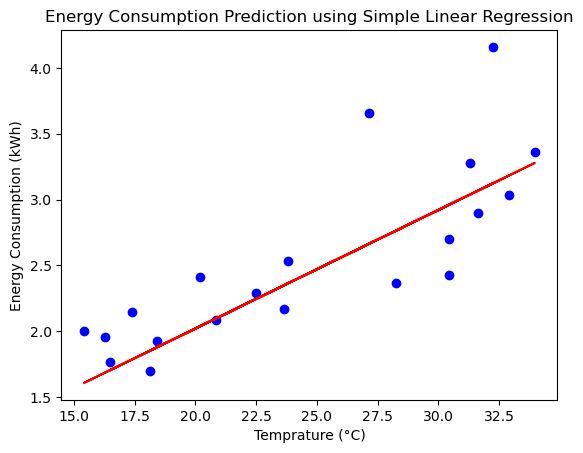

In [67]:
# Plot the test data and regression line
plt.scatter(X_test, y_test, color = 'blue', label = 'Test Data') #Actual data
plt.plot(X_test, y_pred, color = 'red', label = 'Regression Line') #Predicted data
plt.xlabel('Temprature (°C)')
plt.ylabel('Energy Consumption (kWh)')
plt.title('Energy Consumption Prediction using Simple Linear Regression')
plt.show()

In [69]:
import joblib
# Save the model to a file
joblib.dump(model, 'appliance_energy_model.pkl')

['appliance_energy_model.pkl']

In [87]:
import joblib

# Load the model from the file
model = joblib.load('appliance_energy_model.pkl')

# Example data for prediction
new_data = np.array([[22.49]])

# Make predictions
predictions = model.predict(new_data)

# Print the predictions
print('Predicted energy consumptions: ',predictions)


Predicted energy consumptions:  [[2.24530337]]


C:\Users\acer\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
